In [158]:
import pandas as pd

#reading data
df=pd.read_excel('trainingdata_a.xls')
df.columns

Index(['Unnamed: 0', 'x_i1', 'x_i2', 'l_i'], dtype='object')

In [159]:
df=df.drop('Unnamed: 0', axis=1)
df

,x_i1,x_i2,l_i
0,0.780742,0.412337,0
1,0.623970,0.940464,0
2,0.891573,0.435562,0
3,0.590270,0.586359,1
4,0.903968,0.631883,0
...,...,...,...
995,0.549903,0.289499,1
996,0.917967,0.700237,0
997,0.416428,0.444145,1
998,0.475235,0.267784,1


In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
#to produce similar result
np.random.seed(0)
x= df.drop('l_i', axis=1)
y= df['l_i']

#splitting data into test and train
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

clf.score(x_train,y_train), clf.score(x_test,y_test)



(1.0, 0.935)

Enter values between 0 and 1 in order to make prediction, other wise input will be ignored

In [161]:

try:
    inp=float(input())
    #print('hh', inp)
    if inp < 0 or inp > 1:
        print('hello')

        raise Exception('sorry')
    else:
        inp_2=float(input('Enter your expected probability for x_i2: '))
        if inp_2 < 0 or inp_2 > 1:
            print('hello')

            raise Exception('sorry')
        print("following values are taken :" , inp, inp_2)
        
        z=[[inp,inp_2]]
        print('prediction is :', clf.predict(z))
except:
    print('Entered wrong values, try again')



0.5
Enter your expected probability for x_i2: 0.5
following values are taken : 0.5 0.5
prediction is : [1]


In [142]:
# z=[[inp,inp_2]]
# clf.predict(z)

array([1], dtype=int64)

# Data Evaluation:
Cross Validation:

    CV splits data into numbers given to CV If CV=5, it will split data into 5 parts. Moreover, if test_size=0.2, CV will take 
    20 percent of data from every split.

    Cross validation gives u the ability to use different scoring matrices.

    CV: cross validation splitting strategy.

In [162]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x, y, cv=5)

array([0.92 , 0.955, 0.935, 0.935, 0.945])

#  Classification Model Evaluation Using Area Under the Curve (AUC):


In [163]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve

# x_train, x_test , y_train, y_test= train_test_split(x,y, test_size=0.2) 
# clf=RandomForestClassifier().fit(x_train, y_train)

#clf.fit(x_train,y_train)
y_prob = clf.predict_proba(x_test)

In [164]:
y_prob[0:3]

array([[0.08, 0.92],
       [0.97, 0.03],
       [0.99, 0.01]])

In [165]:
y_prob_positive= y_prob[:,1] # finding probability of y only.


In [166]:
fpr, tpr, threshold= roc_curve(y_test, y_prob_positive)


In [167]:
fpr #false_positive_rate


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00714286, 0.00714286, 0.00714286,
       0.02857143, 0.02857143, 0.03571429, 0.03571429, 0.04285714,
       0.04285714, 0.05      , 0.05714286, 0.07857143, 0.07857143,
       0.08571429, 0.10714286, 0.12142857, 0.14285714, 0.15714286,
       0.19285714, 0.22142857, 0.24285714, 0.25      , 0.28571429,
       0.32857143, 0.40714286, 0.45      , 0.54285714, 0.60714286,
       0.7       , 1.        ])

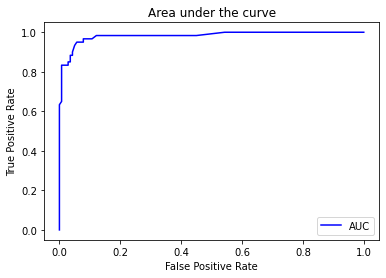

In [168]:
#Creatinf funtion for plotting
import matplotlib.pyplot as plt
def plot_roc(fpr,tpr):
    
    #plot roc curve
    plt.plot(fpr,tpr, color="blue", label="AUC")
    
    #Customize the plot
    plt.title("Area under the curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

plot_roc(fpr,tpr)

In [169]:
#value of AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_prob_positive)

0.9823214285714286

# Confusion Matrics:

    It finds out Where model is confused or has lost his minds.
    model is giving wrong prediction in case 2 and case 4.

In [170]:
from sklearn.metrics import confusion_matrix
y_predicted = clf.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[137,   3],
       [ 10,  50]], dtype=int64)

In [171]:
#Installing seaborn Heatmap
import sys
!conda install -- prefix {sys.prefix} seaborn


PackagesNotFoundError: The following packages are not available from current channels:

  - prefix
  - \users\inn\anaconda3

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.





Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.


In [172]:
import seaborn as sns

conf_mat= confusion_matrix(y_test, y_predicted)

def plot_conf_matrix(conf_mat):
    """
    This function plots confuion matrix
    """
    fig, ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf_mat, annot=True, cbar=False)

    plt.xlabel(" Truth")
    plt.ylabel("predicted")

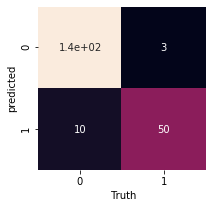

In [173]:
plot_conf_matrix(conf_mat)
